In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
from feature_engine.outliers import Winsorizer
from scipy.stats import yeojohnson

In [2]:
data=pd.read_csv('GPVS-Faults.csv')

In [3]:
data.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective/Non Defective
0,8.491664,1.544891,101.300049,142.968750,0.381835,-0.490112,0.094844,-110.466919,150.391235,-39.679209,0.465142,50.185838,154.751450,49.995163,0
1,2.946039,2.320648,90.728760,146.777344,0.039428,0.584106,-0.670537,-5.605316,-130.718384,136.930440,0.669008,49.907602,154.872942,50.001987,0
2,6.059431,1.536377,101.623535,142.968750,0.301269,0.134277,-0.381841,-113.673401,-30.859375,147.361552,0.447712,49.934645,154.892021,50.008262,1
3,0.762262,2.373627,88.256836,147.363281,0.240844,0.429688,-0.636968,-69.505920,-84.935608,154.325002,0.690778,50.330598,154.803659,49.993744,1
4,0.601378,2.286591,88.409424,147.656250,0.475829,0.187988,-0.663823,-106.067047,-46.361389,150.969849,0.699244,49.948302,155.071592,50.004186,1


In [4]:
data.rename(columns={'Defective/Non Defective ': 'Defective_Non_Defective'},inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     30000 non-null  float64
 1   Ipv                      30000 non-null  float64
 2   Vpv                      30000 non-null  float64
 3   Vdc                      30000 non-null  float64
 4   ia                       30000 non-null  float64
 5   ib                       30000 non-null  float64
 6   ic                       30000 non-null  float64
 7   va                       30000 non-null  float64
 8   vb                       30000 non-null  float64
 9   vc                       30000 non-null  float64
 10  Iabc                     30000 non-null  float64
 11  If                       30000 non-null  float64
 12  Vabc                     30000 non-null  float64
 13  Vf                       30000 non-null  float64
 14  Defective_Non_Defectiv

In [6]:
data.describe()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective_Non_Defective
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,6.625781,1.757652,91.976542,137.076787,-0.022879,0.025592,-0.048809,0.663288,1.025666,0.747015,0.618741,49.341476,154.887091,49.999756,0.666667
std,3.932605,0.434881,23.871453,37.592898,0.747015,0.770528,0.741239,109.922547,109.956147,109.495462,0.847313,4.971143,6.953803,0.023232,0.471412
min,0.000025,0.718048,1.116943,0.585938,-6.358888,-7.264404,-12.688359,-159.034271,-159.215088,-157.752482,0.000001,-0.022219,1.000000,49.492334,0.000000
25%,3.253257,1.431366,90.490723,142.968750,-0.383546,-0.328979,-0.348271,-109.267502,-108.936005,-108.164520,0.451276,49.905288,154.979409,49.995819,0.000000
50%,6.501575,1.517456,101.202393,143.847656,-0.000855,0.020142,-0.059575,1.090927,1.458588,0.642904,0.484648,50.005100,155.246966,50.000088,1.000000
75%,9.821328,2.231720,101.635742,146.777344,0.334838,0.369263,0.289546,110.454864,111.268539,109.849129,0.669136,50.113791,155.446422,50.004349,1.000000
max,14.369075,3.061401,106.304932,237.890625,11.271728,6.438599,6.352168,160.324097,159.649048,159.207052,6.460823,51.337426,156.268283,50.461928,1.000000


In [7]:
data.isna().sum()

Time                       0
Ipv                        0
Vpv                        0
Vdc                        0
ia                         0
ib                         0
ic                         0
va                         0
vb                         0
vc                         0
Iabc                       0
If                         0
Vabc                       0
Vf                         0
Defective_Non_Defective    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.skew()

Time                        0.114887
Ipv                         0.758712
Vpv                        -3.279081
Vdc                        -2.680479
ia                         -0.109050
ib                          0.088248
ic                          0.056013
va                          0.001067
vb                         -0.004071
vc                         -0.000272
Iabc                        6.145156
If                         -8.328405
Vabc                      -21.580826
Vf                         -2.603007
Defective_Non_Defective    -0.707142
dtype: float64

In [10]:
data.kurt()

Time                        -1.111139
Ipv                         -1.083067
Vpv                          9.400712
Vdc                          8.598202
ia                          36.672088
ib                          35.458429
ic                          40.948955
va                          -1.502844
vb                          -1.502283
vc                          -1.493552
Iabc                        37.765892
If                          71.371379
Vabc                       471.349400
Vf                         101.645062
Defective_Non_Defective     -1.500050
dtype: float64

In [11]:
y=pd.DataFrame(data.Defective_Non_Defective)

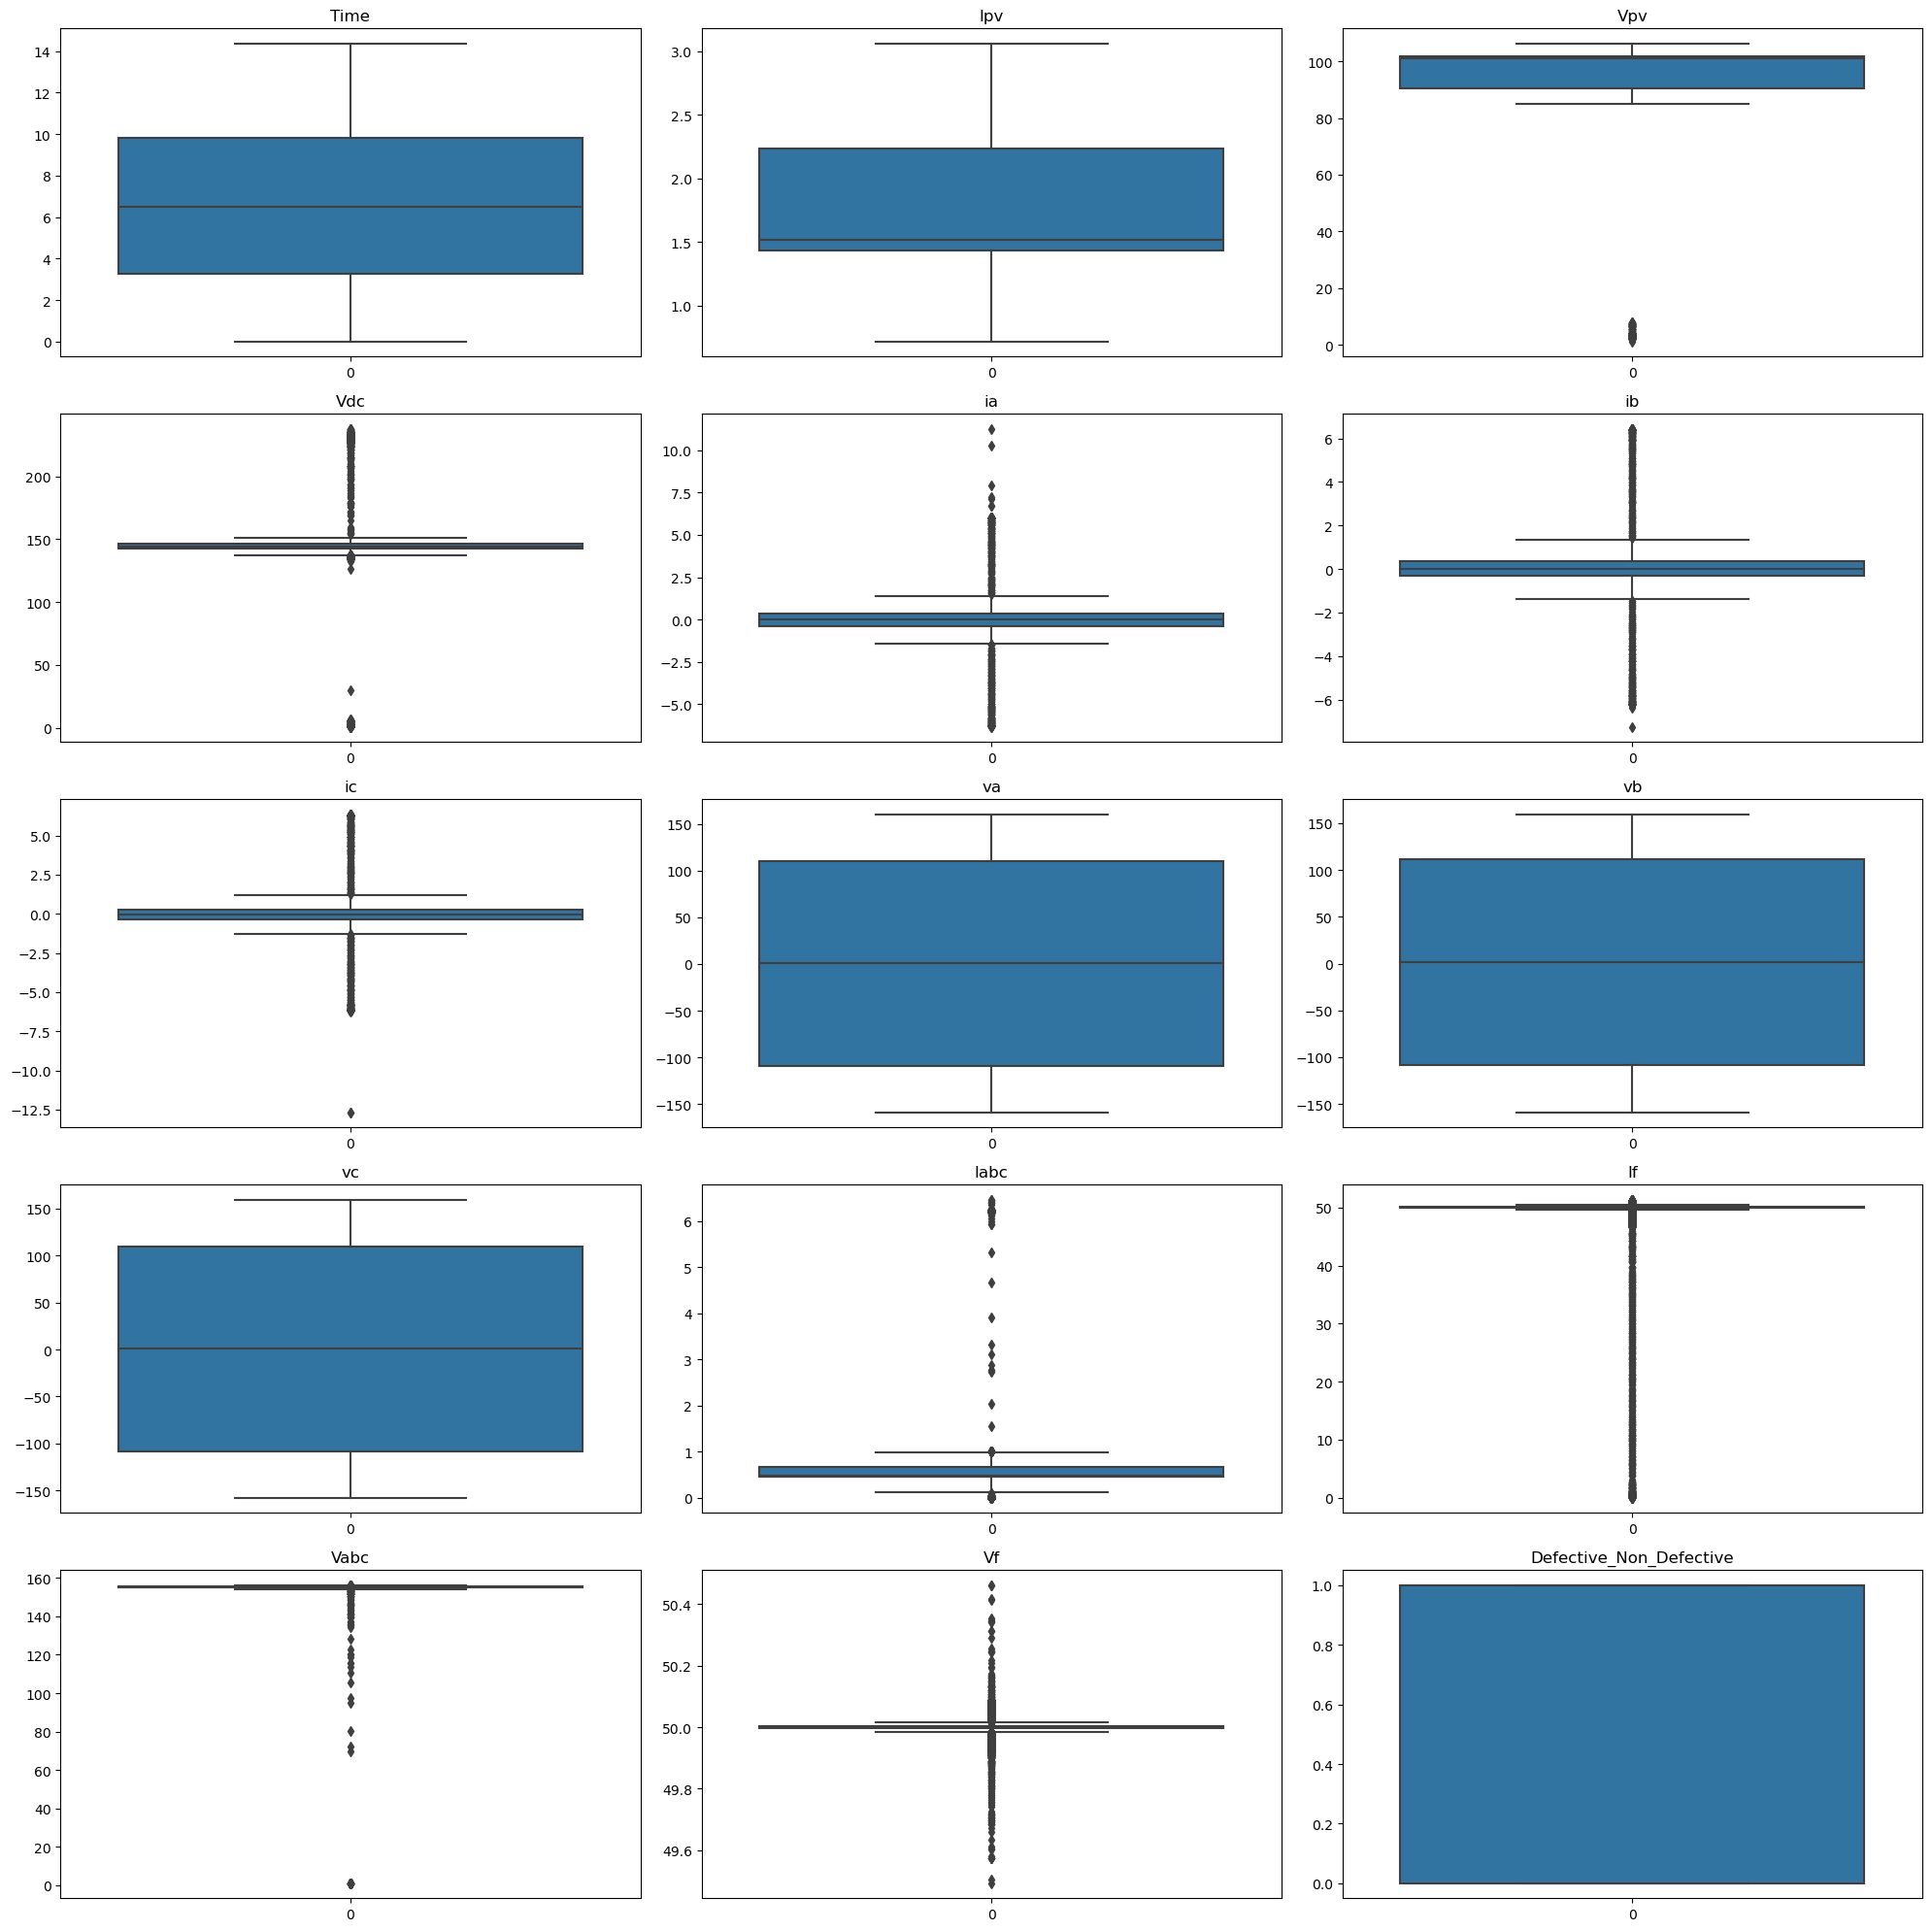

In [12]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):
        sns.boxplot(data[data.columns[i]], ax=ax)
        ax.set_title(data.columns[i])
plt.tight_layout()
plt.show() 


C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_1388\3735110015.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], ax=ax)
C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_1388\3735110015.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.columns[i]], ax=ax

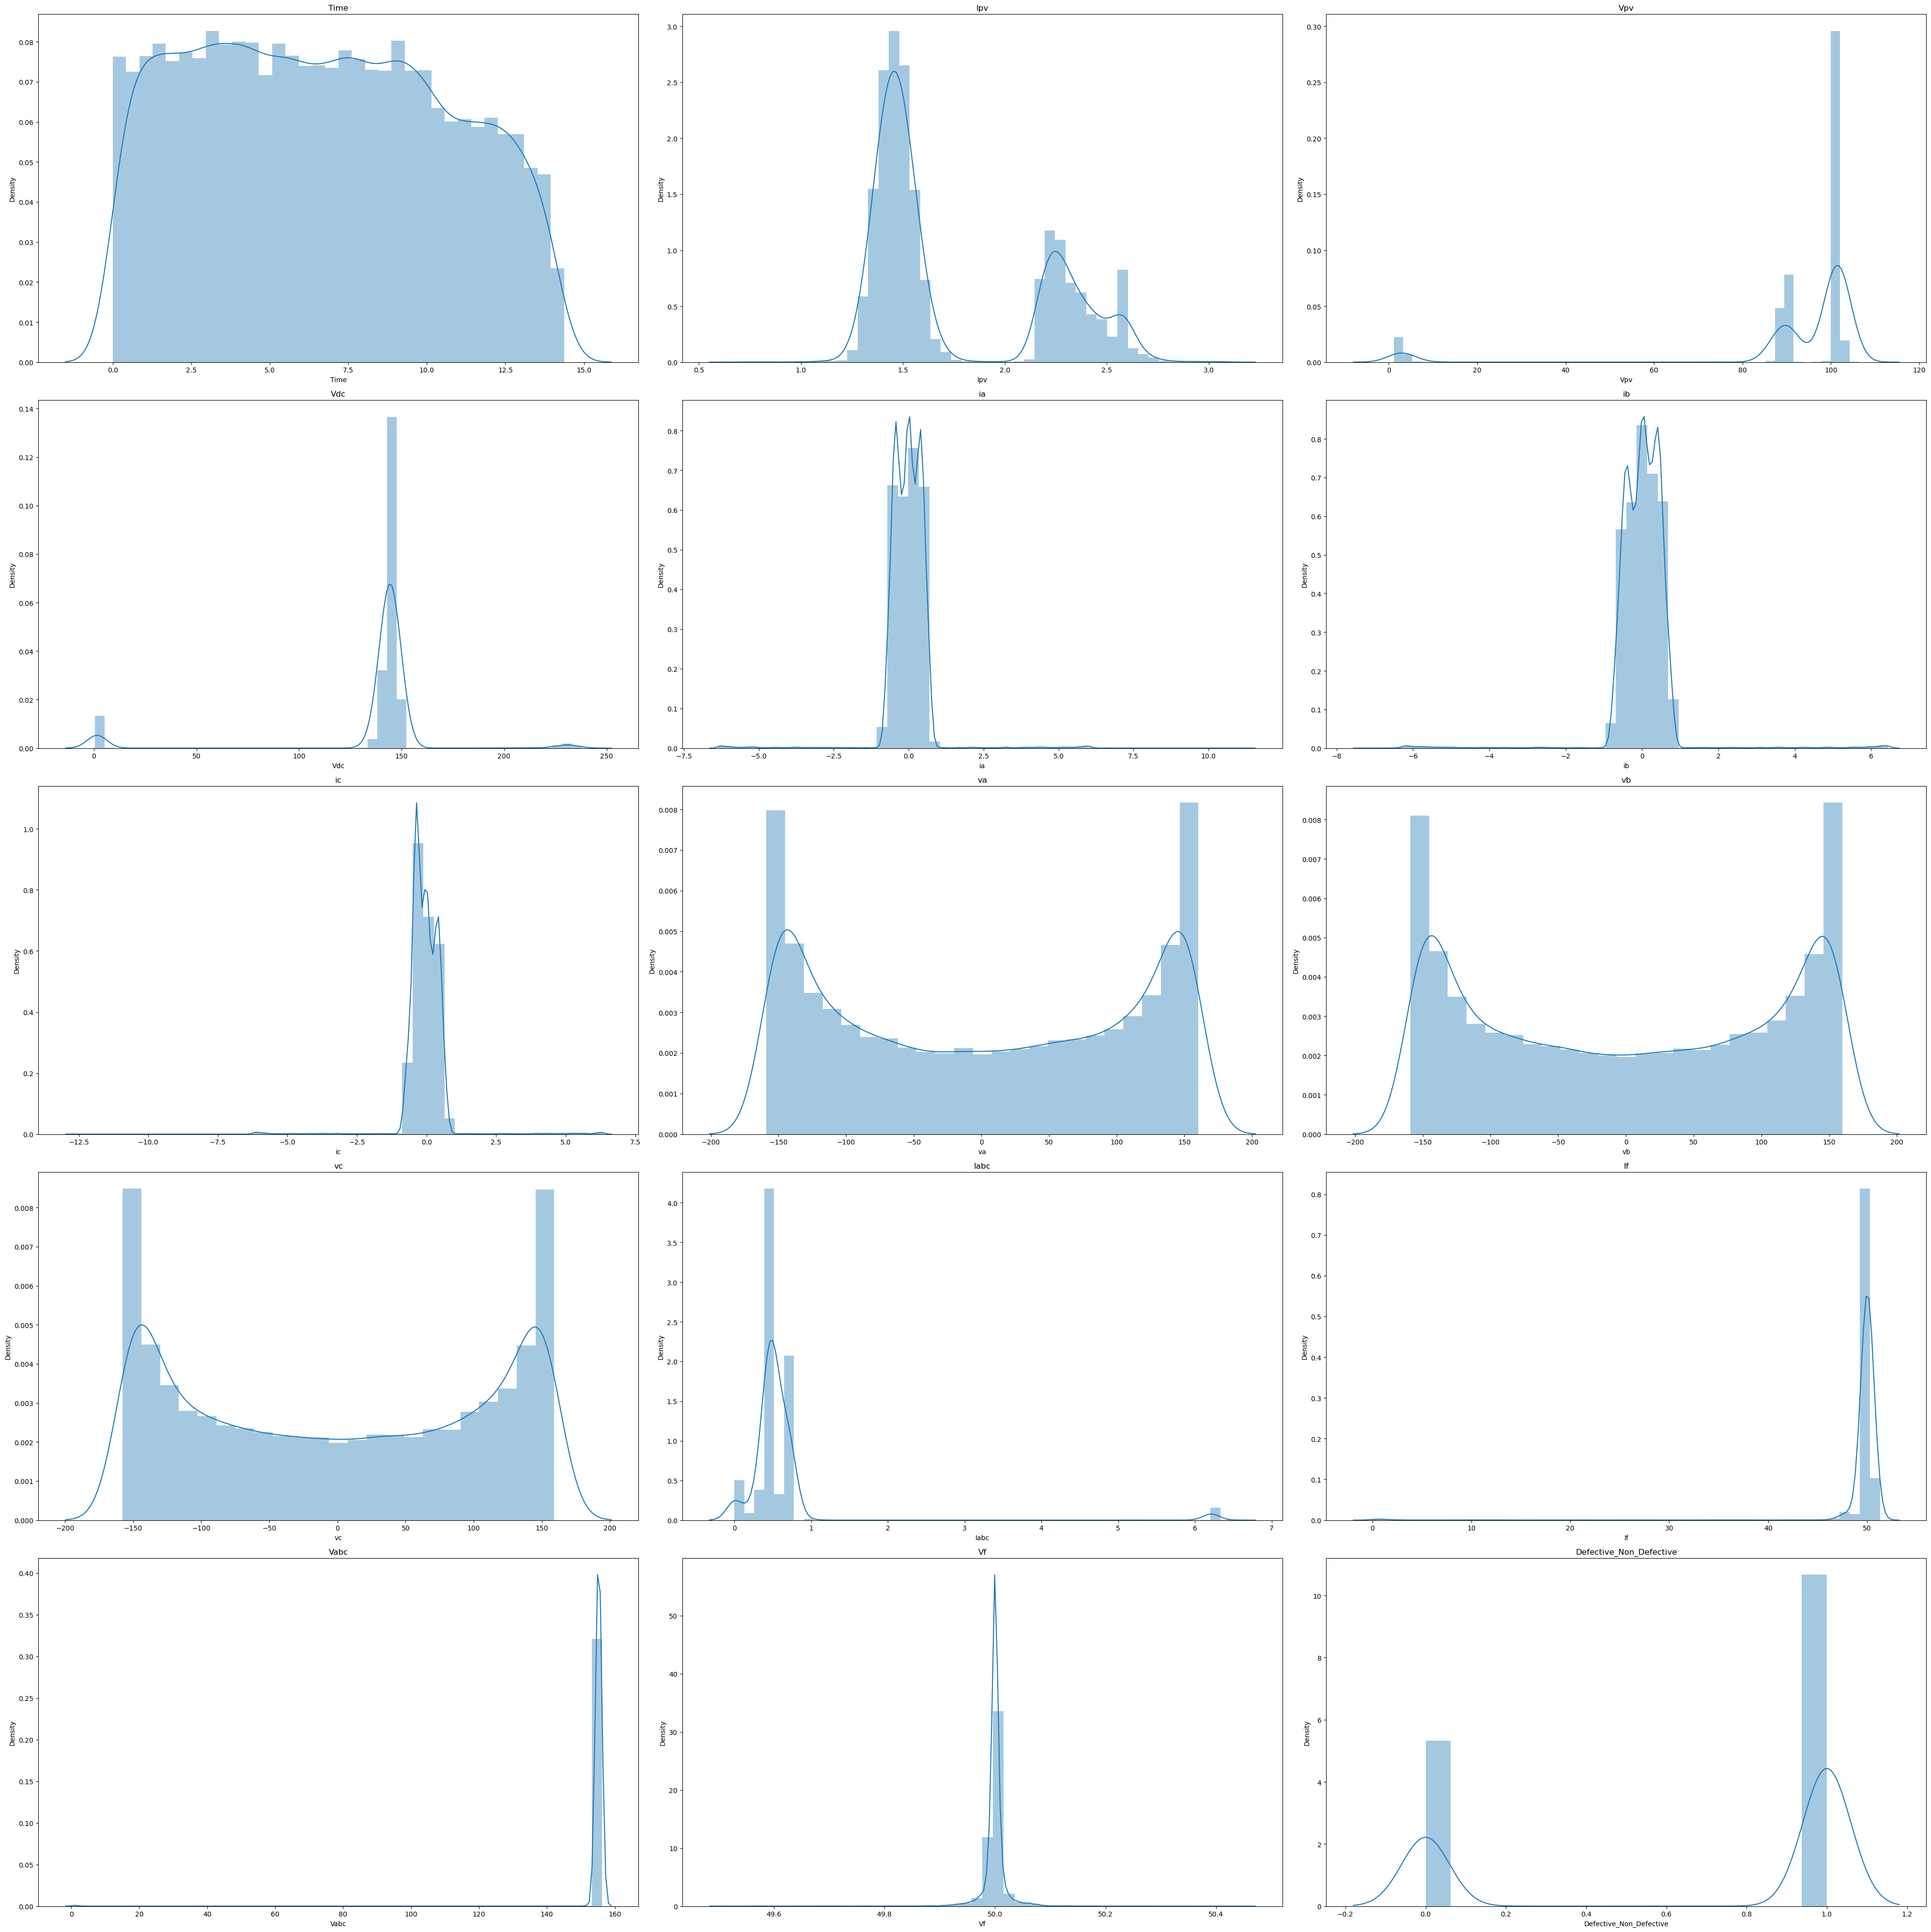

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(40, 40))
for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):
        sns.distplot(data[data.columns[i]], ax=ax)
        ax.set_title(data.columns[i])
plt.tight_layout()
plt.show()

In [14]:
z_scores = stats.zscore(data)

In [15]:
threshold=3.5
outliers = (abs(z_scores) > threshold).any(axis=1)

In [16]:
data[outliers].count()

Time                       2726
Ipv                        2726
Vpv                        2726
Vdc                        2726
ia                         2726
ib                         2726
ic                         2726
va                         2726
vb                         2726
vc                         2726
Iabc                       2726
If                         2726
Vabc                       2726
Vf                         2726
Defective_Non_Defective    2726
dtype: int64

In [17]:
winsor_iqr = Winsorizer(capping_method = 'iqr', 
                      
                          tail = 'both', 
                          fold = 1.5, 
                          variables = ['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc','If', 'Vabc', 'Vf'] )
                      

data = winsor_iqr.fit_transform(data[['Time', 'Ipv', 'Vpv', 'Vdc', 'ia', 'ib', 'ic', 'va', 'vb', 'vc', 'Iabc','If', 'Vabc', 'Vf']])

In [18]:
z_scores = stats.zscore(data)

In [19]:
threshold=3.5
outliers = (abs(z_scores) > threshold).any(axis=1)

In [20]:
data[outliers].count()

Time    0
Ipv     0
Vpv     0
Vdc     0
ia      0
ib      0
ic      0
va      0
vb      0
vc      0
Iabc    0
If      0
Vabc    0
Vf      0
dtype: int64

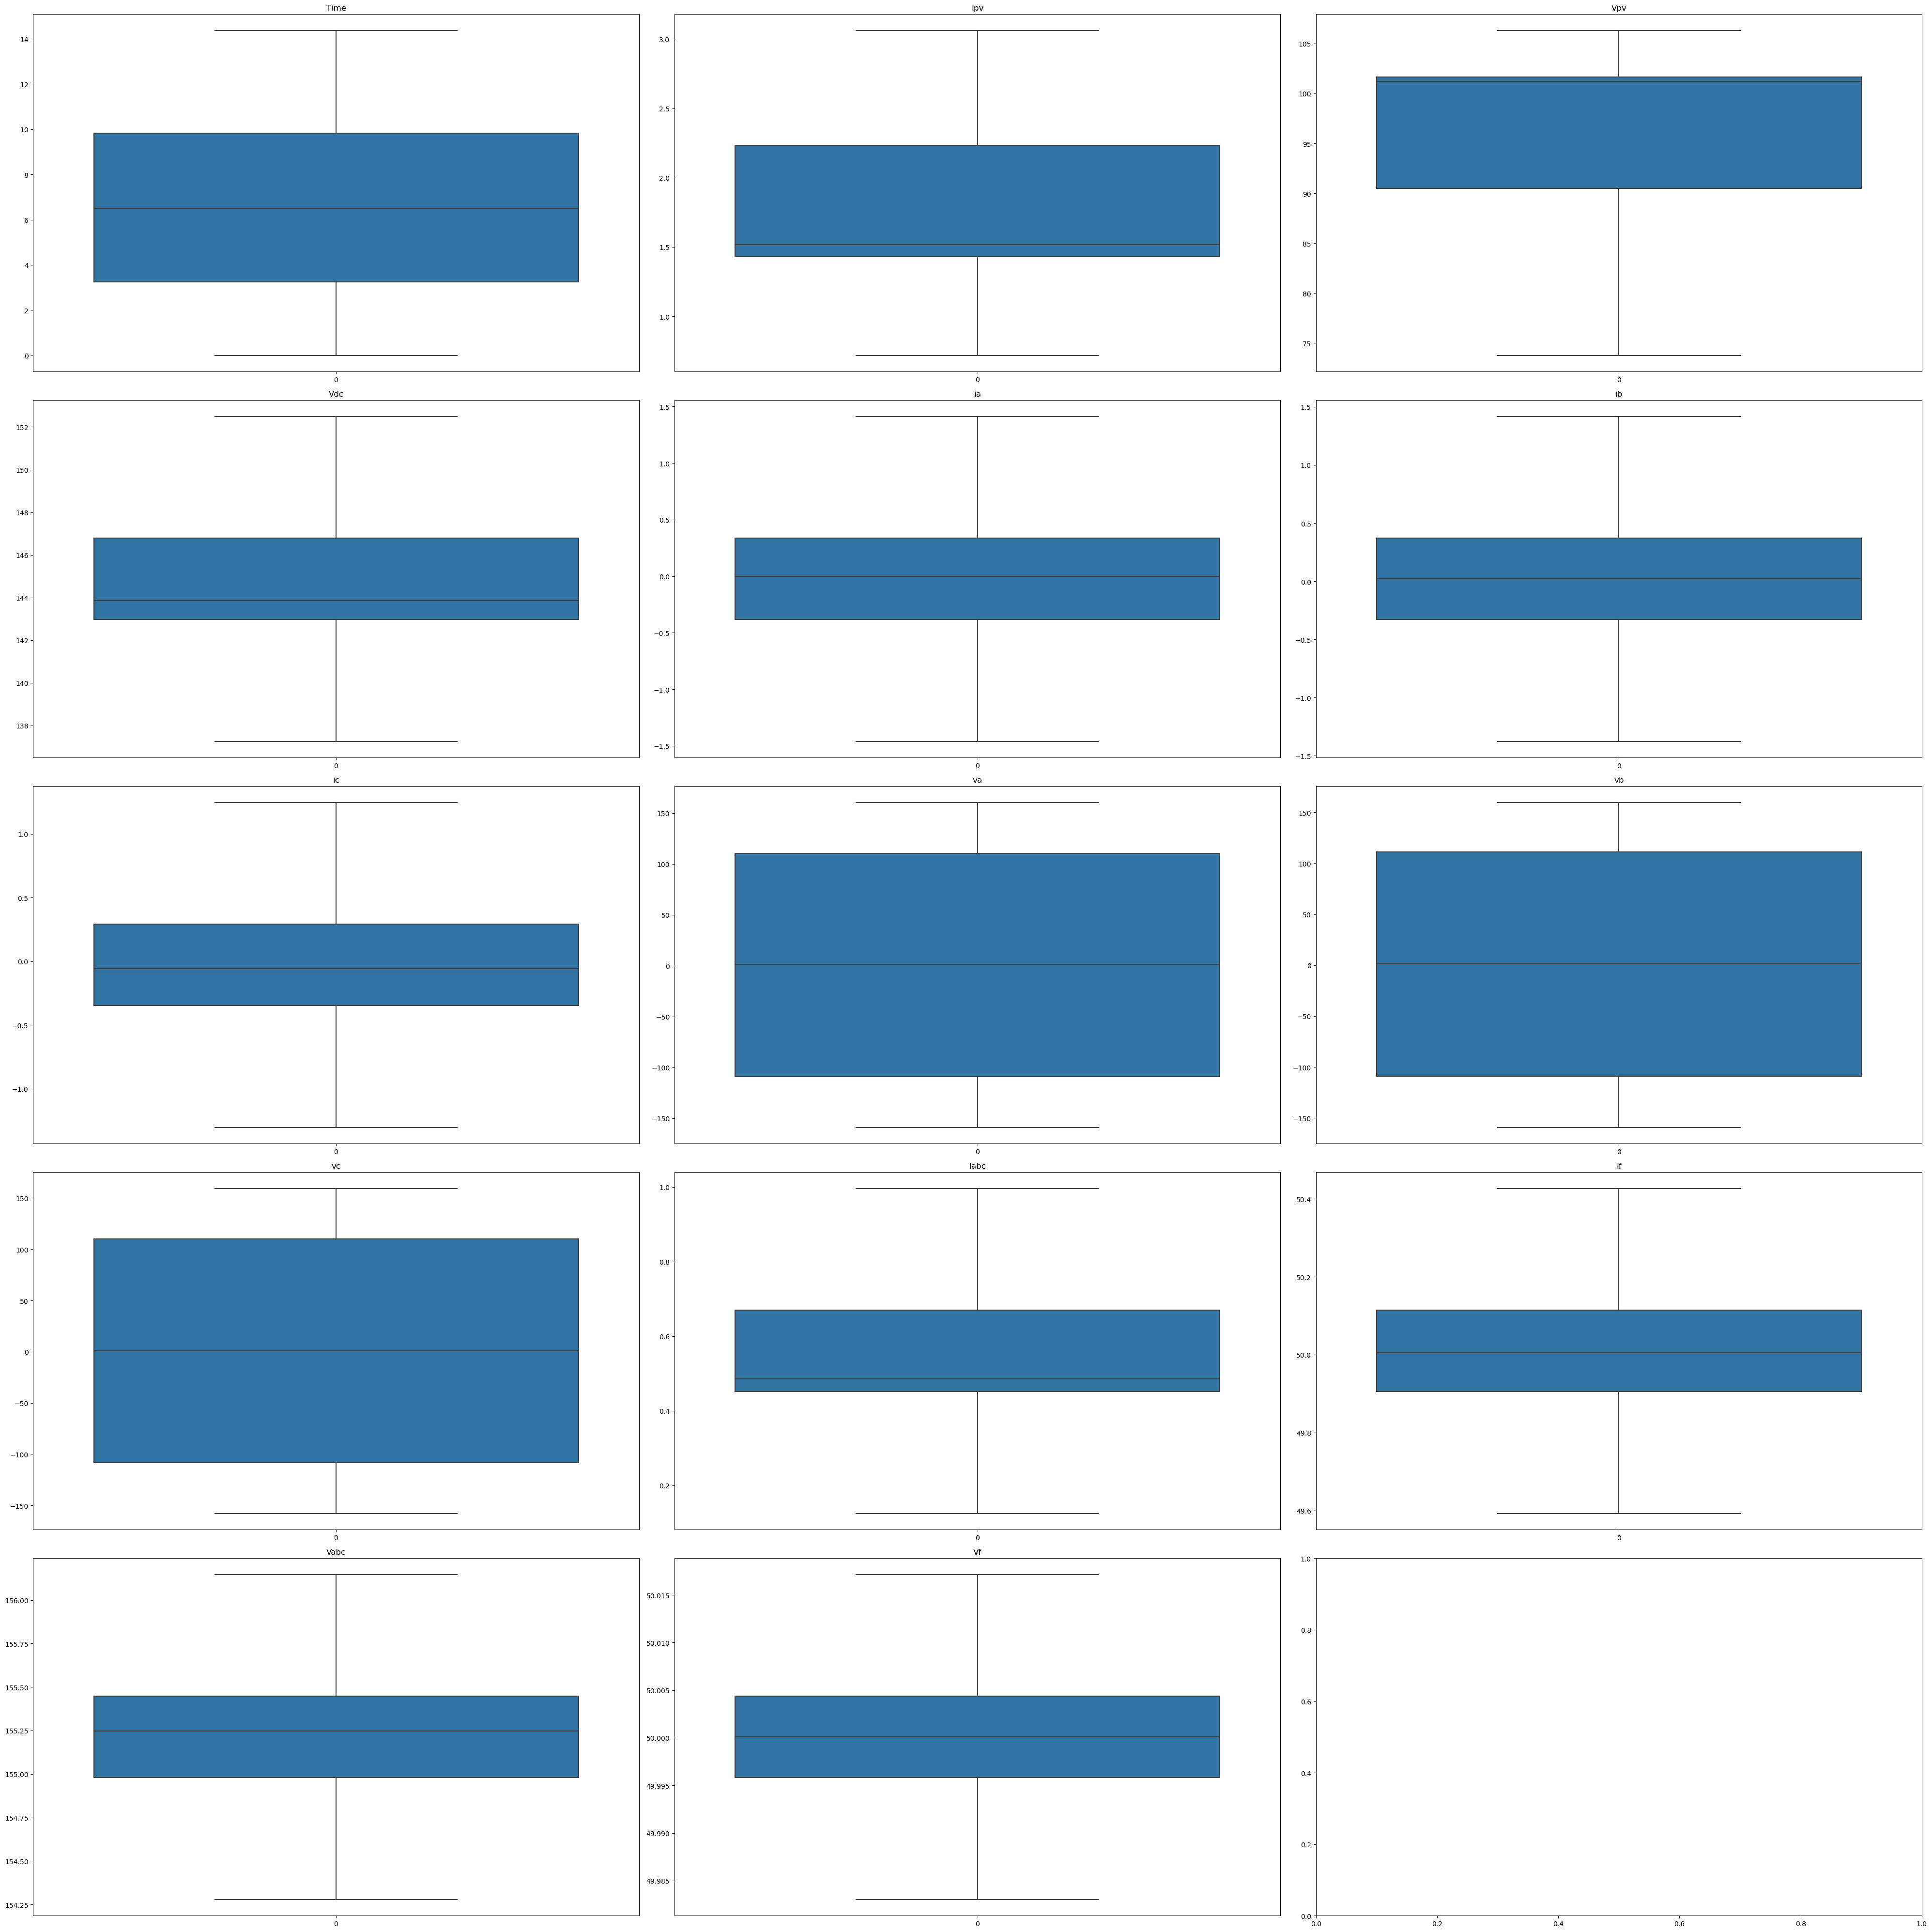

In [21]:
fig, axes = plt.subplots(5, 3, figsize=(40, 40))
for i, ax in enumerate(axes.flatten()):
    if i < len(data.columns):
        sns.boxplot(data[data.columns[i]], ax=ax)
        ax.set_title(data.columns[i])
plt.tight_layout()
plt.show()

In [22]:
columns=[col for col in data.columns if col !='Defective_Non_Defective']

In [23]:
for col in columns:
    data[col], _=yeojohnson(data[col])

In [24]:
data.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf
0,5.155960,0.252922,1.318809e+24,3.221808e+06,0.383153,-0.484886,0.094108,-110.533069,150.276518,-39.751663,0.474142,5.928891,7.797750,7.607217e+22
1,2.229008,0.257513,3.355885e+23,3.507396e+06,0.039443,0.591468,-0.703177,-5.606410,-130.814844,136.577296,0.686795,5.917121,7.799511,7.621555e+22
2,3.975308,0.252829,1.372101e+24,3.221808e+06,0.302107,0.134714,-0.393086,-113.741968,-30.874331,146.974719,0.456084,5.918267,7.799787,7.634763e+22
3,0.686502,0.257665,2.382013e+23,3.552834e+06,0.241389,0.433822,-0.666618,-69.542671,-84.991691,153.915413,0.709654,5.934995,7.798507,7.604239e+22
4,0.551856,0.257408,2.433615e+23,3.575706e+06,0.477827,0.188832,-0.695855,-106.129905,-46.387067,150.571250,0.718551,5.918846,7.802388,7.626182e+22


In [25]:
corr=data.corr()
corr

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf
Time,1.000000,0.064578,-0.089384,-0.313531,-0.010483,0.010693,-0.099699,-0.008552,0.002090,0.005566,-0.238176,-0.108986,0.028496,0.004381
Ipv,0.064578,1.000000,-0.951571,0.242503,0.014059,-0.032865,0.043968,-0.000789,0.000920,-0.004302,0.509024,-0.138196,-0.091769,-0.009302
Vpv,-0.089384,-0.951571,1.000000,-0.232427,-0.014903,0.028078,-0.041963,-0.000834,-0.003481,0.005034,-0.511780,0.170135,-0.004924,-0.000264
Vdc,-0.313531,0.242503,-0.232427,1.000000,0.029103,0.028837,0.045230,0.022649,-0.036482,0.013874,0.378717,-0.013681,0.014789,-0.000816
ia,-0.010483,0.014059,-0.014903,0.029103,1.000000,-0.470266,-0.425064,-0.803156,0.456908,0.346715,0.023452,-0.011852,-0.012057,-0.003789
ib,0.010693,-0.032865,0.028078,0.028837,-0.470266,1.000000,-0.445709,0.362646,-0.800665,0.446803,-0.003121,0.002334,-0.001614,0.022046
ic,-0.099699,0.043968,-0.041963,0.045230,-0.425064,-0.445709,1.000000,0.442258,0.321298,-0.773227,0.039779,-0.042363,-0.013339,-0.020105
va,-0.008552,-0.000789,-0.000834,0.022649,-0.803156,0.362646,0.442258,1.000000,-0.512392,-0.489344,0.005706,-0.008764,0.006571,0.005187
vb,0.002090,0.000920,-0.003481,-0.036482,0.456908,-0.800665,0.321298,-0.512392,1.000000,-0.497813,0.003098,-0.002005,0.008199,-0.021851
vc,0.005566,-0.004302,0.005034,0.013874,0.346715,0.446803,-0.773227,-0.489344,-0.497813,1.000000,-0.008321,0.011488,0.003239,0.018364


In [26]:
data[data[corr]==0].count()

Time    0
Ipv     0
Vpv     0
Vdc     0
ia      0
ib      0
ic      0
va      0
vb      0
vc      0
Iabc    0
If      0
Vabc    0
Vf      0
dtype: int64

<Axes: >

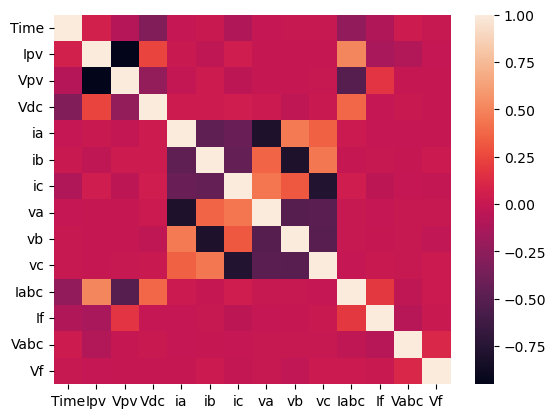

In [27]:
sns.heatmap(corr)


In [28]:
new_data=pd.concat([data,y],axis=1)

In [99]:
new_data.head()

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,Defective_Non_Defective
0,0.429919,2.874588,5.544896e+07,4.853380e+16,-0.481402,0.340781,0.107584,152.019279,-106.090401,-44.269887,0.635885,0.201297,0.191283,8.267982e+43,0
1,5.249144,3.327209,5.406683e+07,5.816005e+16,0.319603,-0.518612,0.140675,-98.986134,154.737859,-51.044061,0.714277,0.201297,0.191283,8.256481e+43,0
2,5.383185,3.555824,5.387919e+07,4.853380e+16,0.452187,-0.245607,-0.257956,-154.908706,64.754822,88.874450,0.667807,0.201297,0.191283,8.256110e+43,0
3,2.010099,3.303775,5.337237e+07,5.100923e+16,0.199831,0.244401,-0.509193,-67.997558,-82.244158,157.381134,0.659051,0.201297,0.191283,8.289174e+43,0
4,6.523967,3.317155,5.166585e+07,5.017206e+16,0.491868,-0.369792,-0.114044,-145.102645,122.572397,22.458258,0.724471,0.201297,0.191283,8.284529e+43,0


In [29]:
new_data.to_csv('model_building_data.csv',index='False')

In [1]:
from pandas_profiling import ProfileReport

C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_10984\3063248848.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
re=ProfileReport(data)
re.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]